### Lecture 32: Outlier Removal using Percentile Method


Works on any type of distribution <br>
Steps
1. Plot Boxplot (optional)
2. Set percentiles
3. Remove or Winsorize them

Importing Libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing dataframe

In [26]:
df=pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: xlabel='placement_exam_marks', ylabel='Count'>

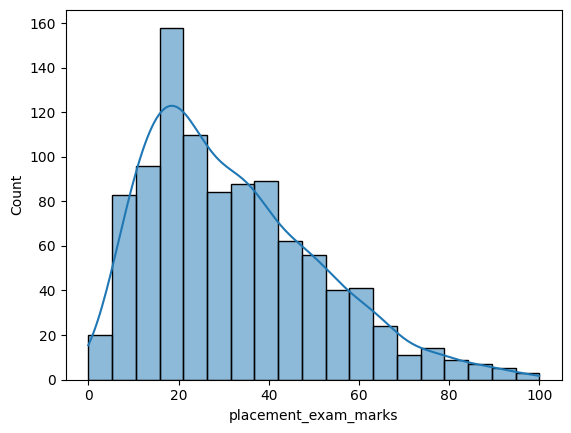

In [27]:
sns.histplot(df['placement_exam_marks'],kde=True)

<Axes: xlabel='cgpa', ylabel='Count'>

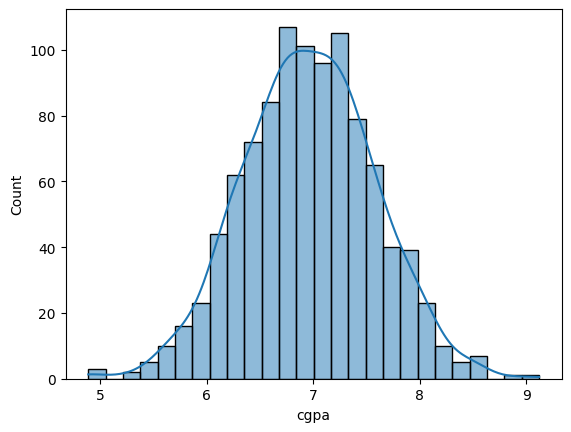

In [28]:
sns.histplot(df['cgpa'],kde=True)

Plotting Boxplot 

<Axes: ylabel='placement_exam_marks'>

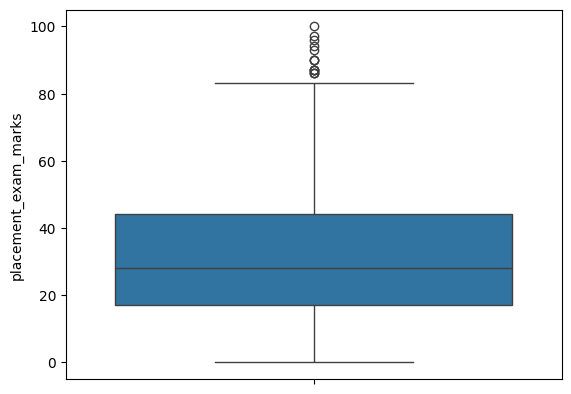

In [29]:
sns.boxplot(df['placement_exam_marks'])

<Axes: ylabel='cgpa'>

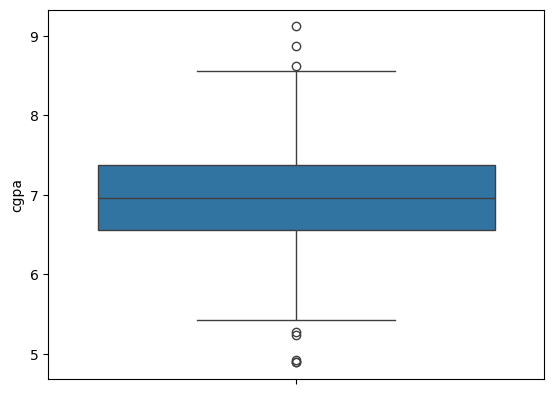

In [30]:
sns.boxplot(df['cgpa'])

In [31]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


Setting Percentiles

In [32]:
High=df['placement_exam_marks'].quantile(0.99)
Low=df['placement_exam_marks'].quantile(0.01)

Outlier Detection

In [33]:
df[(df['placement_exam_marks']>High) | (df['placement_exam_marks']<Low)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
74,6.16,3.0,1
117,7.11,0.0,1
134,6.33,93.0,0
162,7.80,90.0,0
219,5.48,3.0,0
324,6.64,90.0,0
630,6.56,96.0,1
701,6.74,2.0,1
730,6.14,90.0,1


Trimming

In [34]:
new_df=df[(df['placement_exam_marks']<High) & (df['placement_exam_marks']>Low)]

In [35]:
new_df.shape

(974, 3)

Capping

In [36]:
df['Capped']=df['placement_exam_marks'].clip(upper=High,lower=Low)

In [37]:
df[(df['Capped']>High) | (df['Capped']<Low)]

,cgpa,placement_exam_marks,placed,Capped


<Axes: ylabel='Capped'>

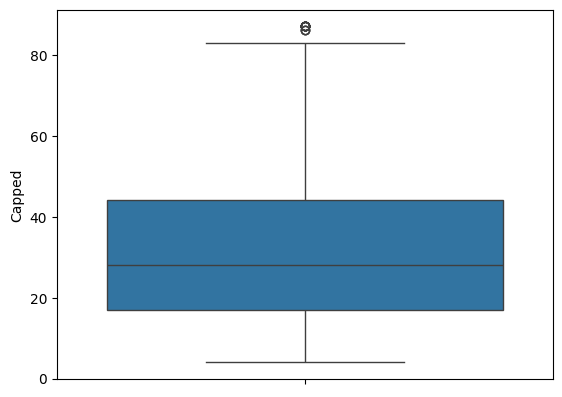

In [38]:
sns.boxplot(df['Capped'])